1. Load data

In [175]:
import os
import numpy as np

# set names to the paths because they're too long
data_path = 'D:\WorkSpace_Thinh1\lab4_ml'
# train path
train_images_path = os.path.join(data_path, 'train-images-idx3-ubyte.gz')
train_labels_path = os.path.join(data_path, 'train-labels-idx1-ubyte.gz')
# test path
test_images_path = os.path.join(data_path, 't10k-images-idx3-ubyte.gz')
test_labels_path = os.path.join(data_path, 't10k-labels-idx1-ubyte.gz')

In [176]:
def get_mnist_data(images_path, labels_path, num_images
, shuffle=False, _is=True, image_size=28):
    """
    This shuffle param is active when .gz is downloaded at:
    - 'http://yann.lecun.com/exdb/mnist/'
    - This function return random num_images in 60000 or 10000
    """
    # read data
    import gzip # to decompress gz (zip) file
    # open file training to read training data
    f_images = gzip.open(images_path,'r')
    # skip 16 first bytes because these are not data, only header infor
    f_images.read(16)
    # general: read num_images data samples if this parameter is set;
    # if not, read all (60000 training or 10000 test)
    real_num = num_images if not shuffle else (60000 if _is else 10000)
    # read all data to buf_images (28x28xreal_num)
    buf_images = f_images.read(image_size * image_size * real_num)
    # images
    images = np.frombuffer(buf_images, dtype=np.uint8).astype(np.float32)
    images = images.reshape(real_num, image_size, image_size,)
    # Read labels
    f_labels = gzip.open(labels_path,'r')
    f_labels.read(8)
    labels = np.zeros((real_num)).astype(np.int64)
    # rearrange to correspond the images and labels
    for i in range(0, real_num):
        buf_labels = f_labels.read(1)
        labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)
        # shuffle to get random images data
    if shuffle is True:
        rand_id = np.random.randint(real_num, size=num_images)
        images = images[rand_id, :]
        labels = labels[rand_id,]
    # change images data to type of vector 28x28 dimentional
    images = images.reshape(num_images, image_size * image_size)
    return images, labels

In [177]:
train_images, train_labels = get_mnist_data(
train_images_path, train_labels_path,60000, shuffle=True)
test_images, test_labels = get_mnist_data(
test_images_path, test_labels_path, 10000, _is=False, shuffle=True)
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


2. Check data

2.1. Visualize data

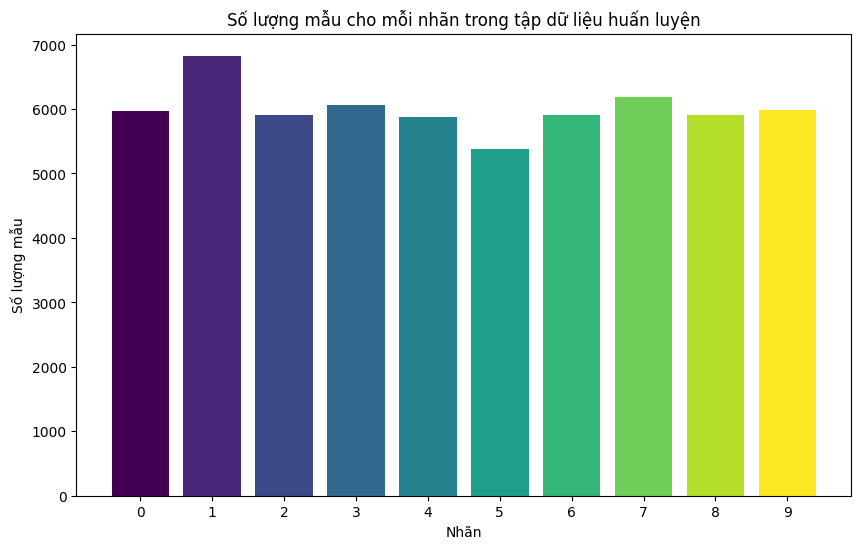

In [178]:
import matplotlib.pyplot as plt

label_counts = np.bincount(train_labels)
colors = plt.cm.viridis(np.linspace(0, 1, len(label_counts)))
labels = np.arange(len(label_counts))

plt.figure(figsize=(10, 6))
plt.bar(labels, label_counts, color=colors)
plt.xlabel('Nhãn')
plt.ylabel('Số lượng mẫu')
plt.title('Số lượng mẫu cho mỗi nhãn trong tập dữ liệu huấn luyện')

plt.xticks(labels)

plt.show()

2.2. Display and Test digit

In [179]:
def get_image(image):
    return image.reshape(28, 28)

In [180]:
def convert_labels(y, C):
    from scipy import sparse
    Y = sparse.coo_matrix((np.ones_like(y),
    (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y

3 9
28


<Figure size 640x480 with 0 Axes>

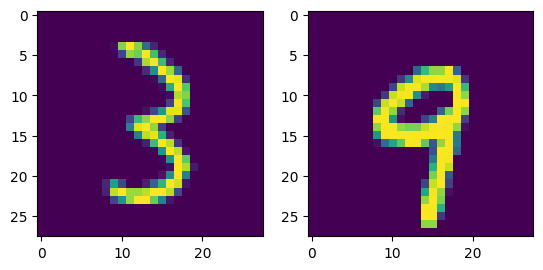

In [181]:
import random
import matplotlib.pyplot as plt

index = random.randint(0, 1000)
print(train_labels[index], test_labels[index])
train_image = np.asarray(get_image(train_images[index])).squeeze()
test_image = np.asarray(get_image(test_images[index])).squeeze()
print(len(train_image))
plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, 2)
# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(train_image)
axarr[1].imshow(test_image)
plt.show()

2.3. Create train and test data

In [182]:
import os
import numpy as np
import gzip

data_path = 'D:\WorkSpace_Thinh1\lab4_ml'

train_images_path = os.path.join(data_path, 'train-images-idx3-ubyte.gz')
train_labels_path = os.path.join(data_path, 'train-labels-idx1-ubyte.gz')
test_images_path = os.path.join(data_path, 't10k-images-idx3-ubyte.gz')
test_labels_path = os.path.join(data_path, 't10k-labels-idx1-ubyte.gz')

def get_mnist_data(images_path, labels_path, num_images, shuffle=False, _is=True, image_size=28):
    f_images = gzip.open(images_path,'r')
    f_images.read(16)
    real_num = num_images if not shuffle else (60000 if _is else 10000)
    buf_images = f_images.read(image_size * image_size * real_num)
    images = np.frombuffer(buf_images, dtype=np.uint8).astype(np.float32)
    images = images.reshape(real_num, image_size, image_size)
    
    # Reshape images to (num_samples, 28, 28)
    images = np.expand_dims(images, axis=-1)

    f_labels = gzip.open(labels_path,'r')
    f_labels.read(8)
    labels = np.zeros((real_num)).astype(np.int64)
    for i in range(0, real_num):
        buf_labels = f_labels.read(1)
        labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)
        
    if shuffle is True:
        rand_id = np.random.randint(real_num, size=num_images)
        images = images[rand_id, :]
        labels = labels[rand_id,]
        
    return images, labels

train_images, train_labels = get_mnist_data(train_images_path, train_labels_path, 60000, shuffle=True)
test_images, test_labels = get_mnist_data(test_images_path, test_labels_path, 10000, _is=False, shuffle=True)

print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)


(60000, 28, 28, 1) (60000,)
(10000, 28, 28, 1) (10000,)


2.4. Normalization data

In [183]:
import numpy as np

train_images = train_images.astype(np.int32)
test_images = test_images.astype(np.int32)

# print(test_images[0])

X_train = train_images / 255.0
X_test = test_images / 255.0

# print(X_train[0])

In [184]:
from keras.utils import to_categorical

y_train = to_categorical(train_labels, num_classes=10)
y_test = to_categorical(test_labels, num_classes=10)

# print(y_train[0])

2.5. Split data

In [185]:
from sklearn.model_selection import train_test_split

(X_train, X_val, y_train, y_val) = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

3. Build Model

In [186]:
import os
import numpy as np
import keras
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Convolution2D
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from matplotlib import pyplot as plt

In [187]:
model = Sequential()

model.add(
    Conv2D(filters=24, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
model.add(Conv2D(filters=36, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
model.add(Conv2D(filters=48, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adam(learning_rate=5e-4))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 28, 28, 24)        624       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 14, 14, 24)        0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 14, 14, 36)        21636     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 7, 7, 36)          0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 7, 7, 48)          43248     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 4, 4, 48)         

In [188]:
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2)
datagen.fit(X_train)

In [189]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if 'accuracy' in logs and logs['accuracy'] > 0.995:
      print("\nReached 99.5% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [190]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=100), steps_per_epoch=len(X_train) / 100,
                    epochs=30, validation_data=(X_val,y_val), callbacks=[callbacks])

Epoch 1/30
540/540 [==============================] - 70s 126ms/step - loss: 0.4498 - accuracy: 0.8514 - val_loss: 0.0865 - val_accuracy: 0.9743
Epoch 2/30
540/540 [==============================] - 81s 150ms/step - loss: 0.1298 - accuracy: 0.9597 - val_loss: 0.0560 - val_accuracy: 0.9820
Epoch 3/30
540/540 [==============================] - 61s 112ms/step - loss: 0.0894 - accuracy: 0.9721 - val_loss: 0.0656 - val_accuracy: 0.9802
Epoch 4/30
540/540 [==============================] - 61s 113ms/step - loss: 0.0737 - accuracy: 0.9772 - val_loss: 0.0336 - val_accuracy: 0.9888
Epoch 5/30
540/540 [==============================] - 61s 112ms/step - loss: 0.0598 - accuracy: 0.9814 - val_loss: 0.0341 - val_accuracy: 0.9888
Epoch 6/30
540/540 [==============================] - 61s 113ms/step - loss: 0.0551 - accuracy: 0.9826 - val_loss: 0.0303 - val_accuracy: 0.9895
Epoch 7/30
540/540 [==============================] - 61s 112ms/step - loss: 0.0479 - accuracy: 0.9844 - val_loss: 0.0408 - val_ac

5. Plot Loss and Accuracy while training

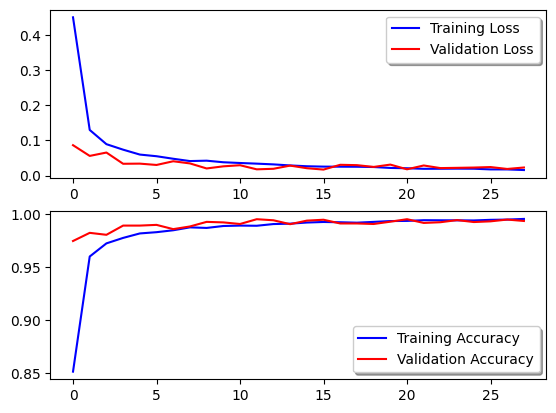

In [191]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation Loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training Accuracy")
ax[1].plot(history.history['val_accuracy'], color='r', label="Validation Accuracy")
legend = ax[1].legend(loc='best', shadow=True)


6. Result

6.1. Confusion matrix

313/313 [==============================] - 5s 16ms/step


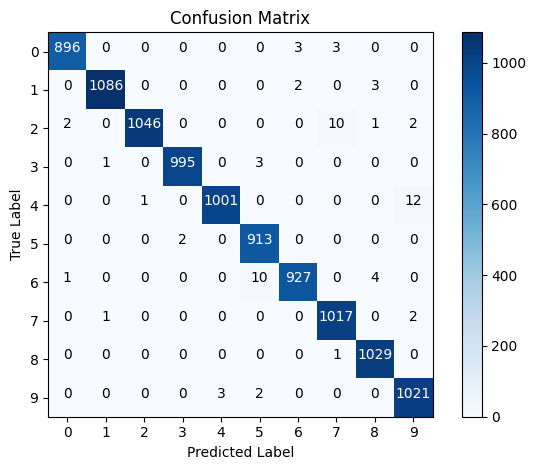

In [192]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import itertools

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Tính confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Vẽ biểu đồ confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, range(10))
plt.yticks(tick_marks, range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

6.2. Recall and Precision

In [193]:
recall = recall_score(y_true, y_pred, average='macro')
precision = precision_score(y_true, y_pred, average='macro')
print("Recall:", recall)
print("Precision:", precision)

Recall: 0.9930908337189376
Precision: 0.9930624214708554


6.3. Predict test data

In [194]:
test_loss, test_acc = model.evaluate(X_test, y_test)

313/313 [==============================] - 5s 15ms/step - loss: 0.0191 - accuracy: 0.9931


6.4. Visual data test predict

313/313 [==============================] - 5s 14ms/step


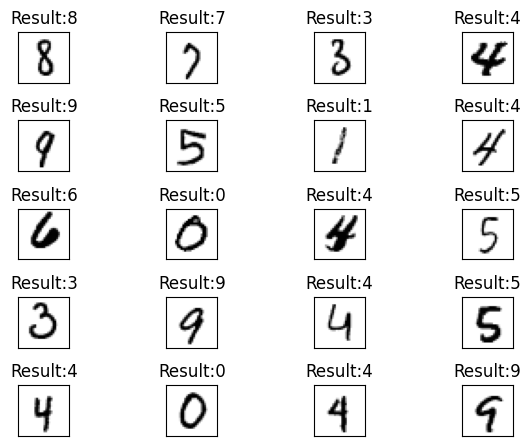

In [195]:
import os 
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential, load_model
import cv2
from PIL import Image
from keras.datasets import mnist
import matplotlib.pyplot as plt     

digits = ['0','1','2','3','4','5','6','7','8','9']
x_test = np.expand_dims(X_test, axis=3)
predict = model.predict(X_test) 

for i in range(20):      
    plt.subplot(5,4,i+1)     
    plt.tight_layout()
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i].reshape(28,28),cmap = 'binary')        
    plt.title('Result:'+ digits[np.argmax(predict[i])])
plt.show()

In [196]:
model.save('model_v2.h5')

d:\anaconda3\envs\ml_311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
